In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv('/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241128.csv')

In [5]:
data


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0
...,...,...,...,...,...,...,...
1913,19/01/2023,11337,8671,262,14881,0,66.0
1914,16/08/2023,16791,11800,387,20936,4684,113.0
1915,10/01/2022,5732,3548,73,6644,0,25.0
1916,04/05/2020,3717,1952,70,4411,131,19.0


In [16]:
data['Date'] = pd.to_datetime(data['Date'])
data


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,2024-08-30,16436,10705,225,19026,3925,59.0
1,2023-09-15,15499,10671,267,18421,4519,61.0
2,2021-12-28,1756,2352,0,3775,0,13.0
3,2023-01-11,10536,8347,223,14072,0,48.0
4,2021-09-11,820,612,0,1283,0,11.0
...,...,...,...,...,...,...,...
1913,2023-01-19,11337,8671,262,14881,0,66.0
1914,2023-08-16,16791,11800,387,20936,4684,113.0
1915,2022-01-10,5732,3548,73,6644,0,25.0
1916,2020-05-04,3717,1952,70,4411,131,19.0


In [20]:
Total_services = data[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].sum()

Total_services_data = Total_services.reset_index()
Total_services_data.columns = ['Service Type', 'Total Journeys']

print(Total_services_data)


   Service Type  Total Journeys
0   Local Route      18971696.0
1    Light Rail      13800866.0
2  Peak Service        344437.0
3   Rapid Route      24161455.0
4        School       4512469.0
5         Other         82355.0


In [21]:
Total_services_data = Total_services_data.sort_values(by='Total Journeys',ascending=False)
print(Total_services_data)


   Service Type  Total Journeys
3   Rapid Route      24161455.0
0   Local Route      18971696.0
1    Light Rail      13800866.0
4        School       4512469.0
2  Peak Service        344437.0
5         Other         82355.0


<ipython-input-34-5f1fbcb7cd56>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Journeys', y='Service Type', data=Total_services_data, palette='viridis')


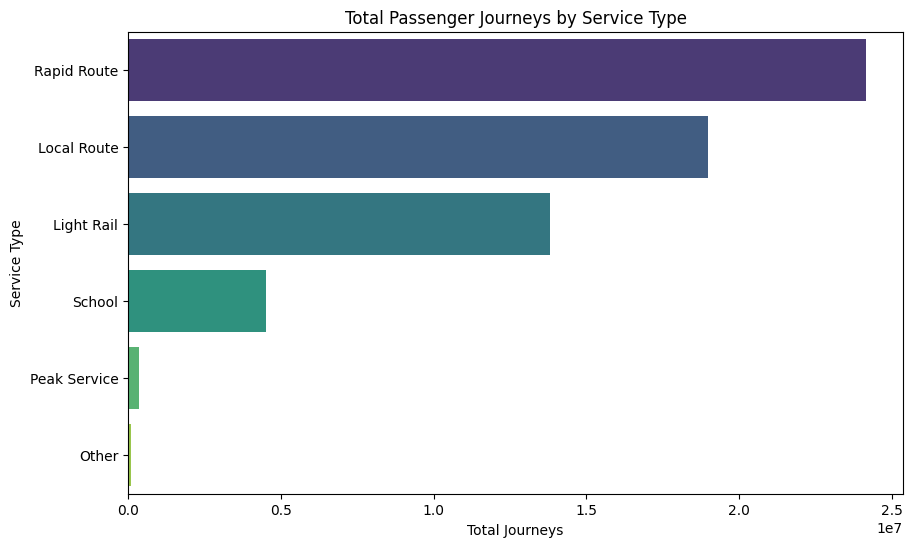

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Journeys', y='Service Type', data=Total_services_data, palette='viridis')
plt.title('Total Passenger Journeys by Service Type')
plt.xlabel('Total Journeys')
plt.ylabel('Service Type')
plt.show()

#Add extra buses on Mondays wil help to accommodate higher ridership

In [32]:
data['Day_of_Week'] = data['Date'].dt.day_name()
school_monday = data[data['Day_of_Week'] == 'Monday']['School'].sum()

if school_monday > 20000:
    print("Add buses")


#Add extra buses on Mondays will help to accommodate higher ridership for school. So that they can reach on time.

Add buses


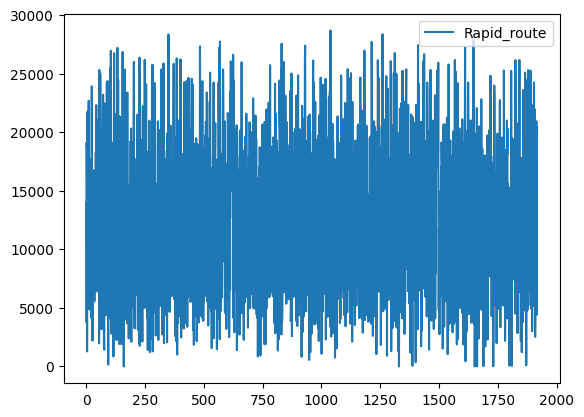

In [41]:
series_air = data['Rapid Route']

series_air.plot(label='Rapid_route')
plt.legend();

In [53]:
data['Day_Type'] = data['Day_of_Week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

weekday_weekend_data = data.groupby(['Day_Type'])[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].sum().reset_index()
weekday_weekend_data_melted = pd.melt(weekday_weekend_data, id_vars=['Day_Type'], var_name='Service Type', value_name='Total Journeys')

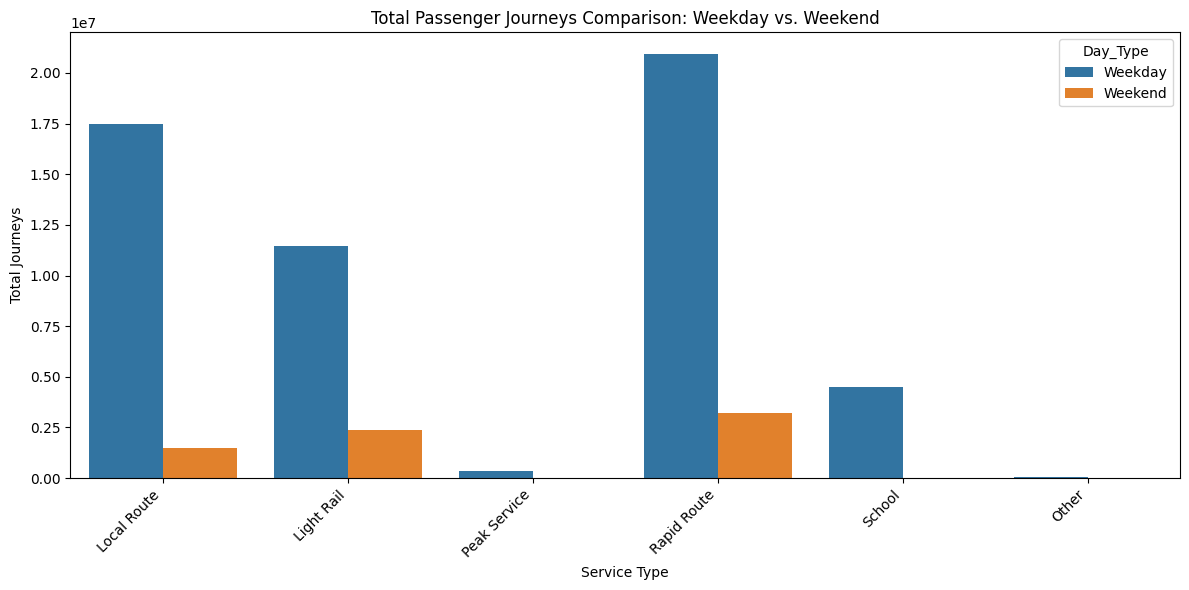

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Service Type', y='Total Journeys', hue='Day_Type', data=weekday_weekend_data_melted)
plt.title('Total Passenger Journeys Comparison: Weekday vs. Weekend')
plt.xlabel('Service Type')
plt.ylabel('Total Journeys')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [62]:
service_totals = data[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].sum()

service_totals_sorted = service_totals.sort_values(ascending=False)

print(service_totals_sorted)



Rapid Route     1904306.0
Local Route     1575968.0
Light Rail      1099021.0
School           457855.0
Peak Service      28098.0
Other              8354.0
dtype: float64


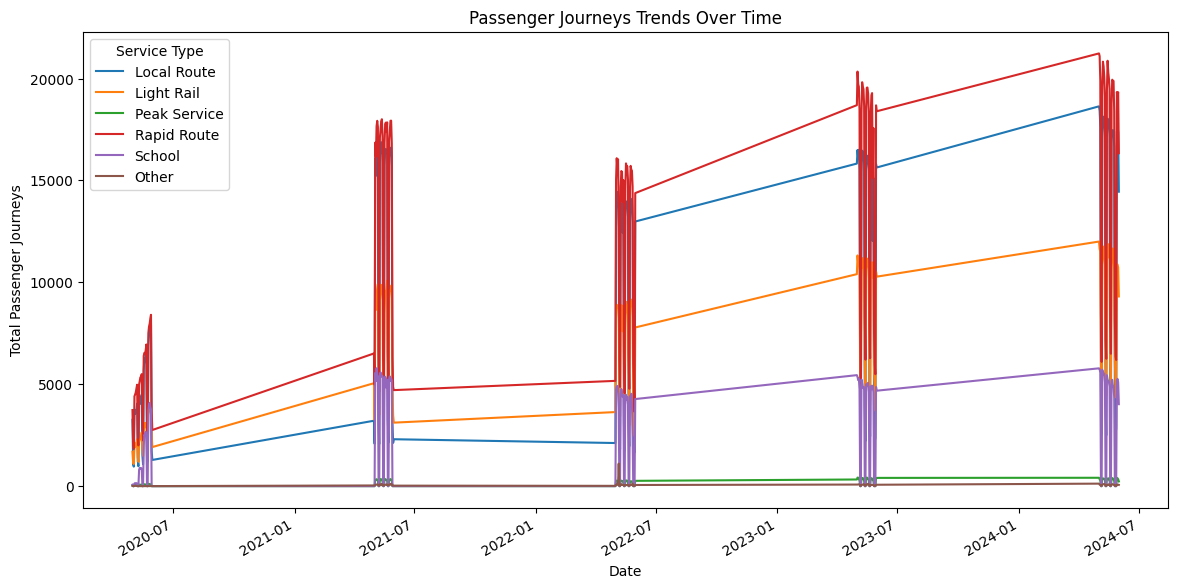

In [58]:
time_series_data = data.groupby('Date').sum()

time_series_data[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].plot(kind='line', figsize=(14, 7))
plt.title('Passenger Journeys Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Passenger Journeys')
plt.legend(title='Service Type')
plt.show()


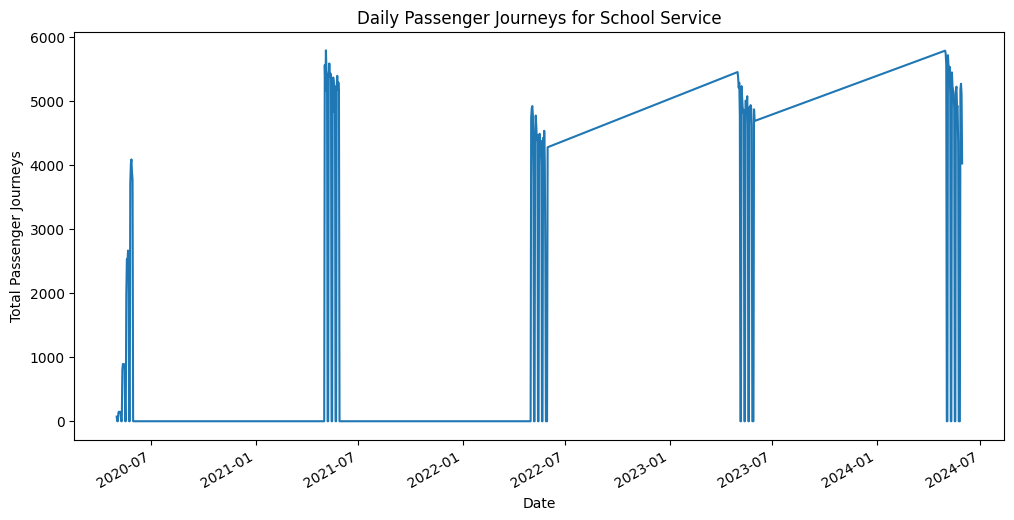

In [59]:
school_data = data[['Date', 'School']]

school_daily_data = school_data.groupby('Date').sum()

school_daily_data['School'].plot(kind='line', figsize=(12, 6))
plt.title('Daily Passenger Journeys for School Service')
plt.xlabel('Date')
plt.ylabel('Total Passenger Journeys')
plt.show()


<ipython-input-61-5d3bf8aa4bbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may['Total Journeys'] = df_may[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].sum(axis=1)
<ipython-input-61-5d3bf8aa4bbc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may['School Proportion'] = df_may['School'] / df_may['Total Journeys']


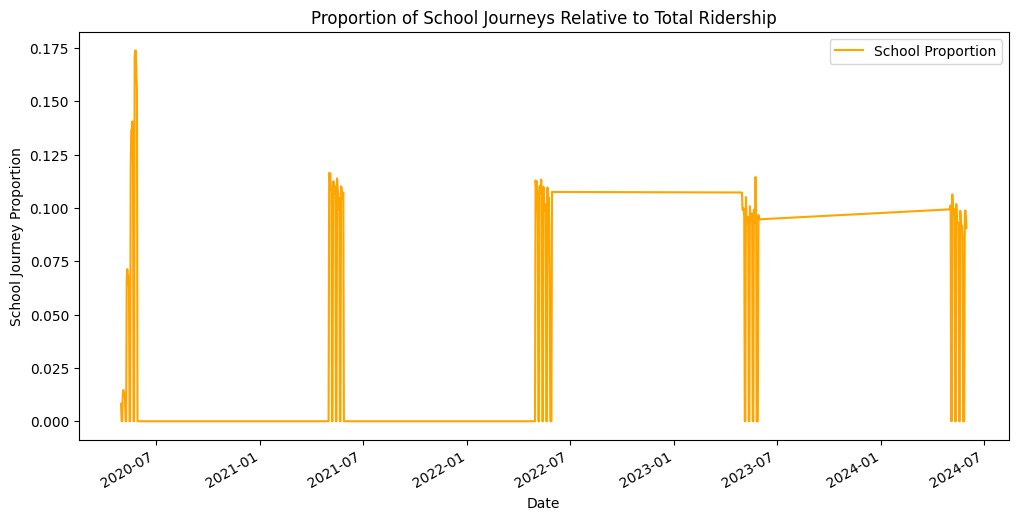

In [61]:
data['Total Journeys'] = data[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].sum(axis=1)

data['School Proportion'] = data['School'] / data['Total Journeys']

data[['Date', 'School Proportion']].groupby('Date').mean().plot(figsize=(12, 6), color='orange')
plt.title('Proportion of School Journeys Relative to Total Ridership')
plt.xlabel('Date')
plt.ylabel('School Journey Proportion')
plt.show()
